In [13]:
import pandas as pd
import seaborn as sns
import numpy as np

from snippets import (custom_preprocess,
                      custom_tokenize, getTopWordsByCategory, 
                      plotTopWordsByCategory, plotTopWords, 
                      plotClassShares, printSampleComments,
                      plotSetIntersections, calculateUncertanityCoeff,
                      plotUncertanityCoeff)

from bag_of_words import (calculateTFIDFscore, fitModel, NbSvmClassifier, trainBagOfWords)

from config import (APPO)

In [14]:
# Load data
file = "C:/Users/Magda/Documents/detect-toxic-comments/data/train.csv"
df = pd.read_csv(file)

In [15]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [16]:
df.dtypes

id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
dtype: object

In [17]:
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [18]:
UNIQUE_ID = "id"
TOXIC_LABELS = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
CONTENT_LABEL = "comment_text"
df[CONTENT_LABEL].fillna("unknown", inplace=True)

for col in TOXIC_LABELS:
    print("Labels for %s are: %s" % (col, ', '.join(map(str, df[col].unique()))))

Labels for toxic are: 0, 1
Labels for severe_toxic are: 0, 1
Labels for obscene are: 0, 1
Labels for threat are: 0, 1
Labels for insult are: 0, 1
Labels for identity_hate are: 0, 1


In [19]:
INNOCENT_LABEL = "innocent"
df[INNOCENT_LABEL] = (df[TOXIC_LABELS].sum(axis = 1) == 0).astype(int)
LABELS = TOXIC_LABELS + [INNOCENT_LABEL]

In [20]:
# Sample comments
printSampleComments(df, CONTENT_LABEL, TOXIC_LABELS, 3)

TOXIC: 
YOU WILL DIE IN 7 DAYS.

Stop being a fag
Please stop being a giant faggot.

And how did I create that account? I cannot change my ip address, since proxies are blocked in wikipedia, and I'm not so stupid to go in some internet cafes only to edit something that would have been undid soon after. Just for you to know, I told ALL my friends to edit those pages, because I want Wikipedia to be a REAL encyclopedia, not just a stupid website with untrue information. I don't care anymore though. You don't even care about your own website. It's full of people who are distorting and deforming the facts, and you don't do a damn thing about it. Instead, you ban users who are trying to correct those facts. And what about those other reasons you don't let a page to be created? Notability? Who cares about notability? And Encyclopedia's goal should be to provide information about as much thing as possible and as much correct as possible. Unfortunately that is not what you are doing. You are do

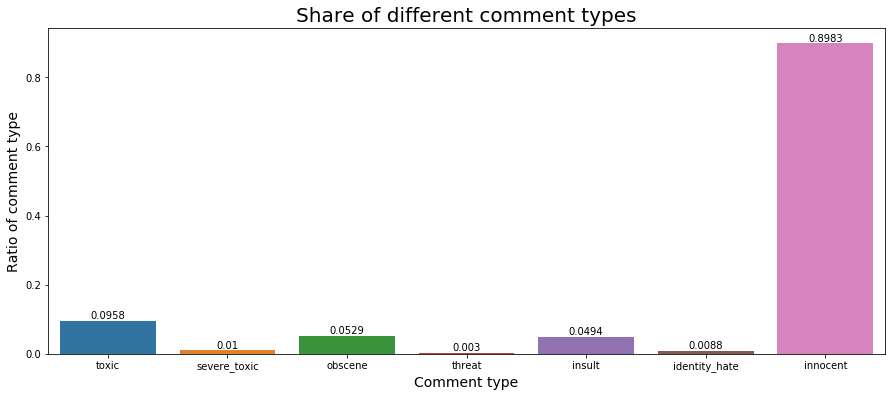

In [21]:
# Analyse share of each label
ratio = df[LABELS].mean()
plotClassShares(LABELS, ratio)

There are 159571 comments, but 178444 comment labels.


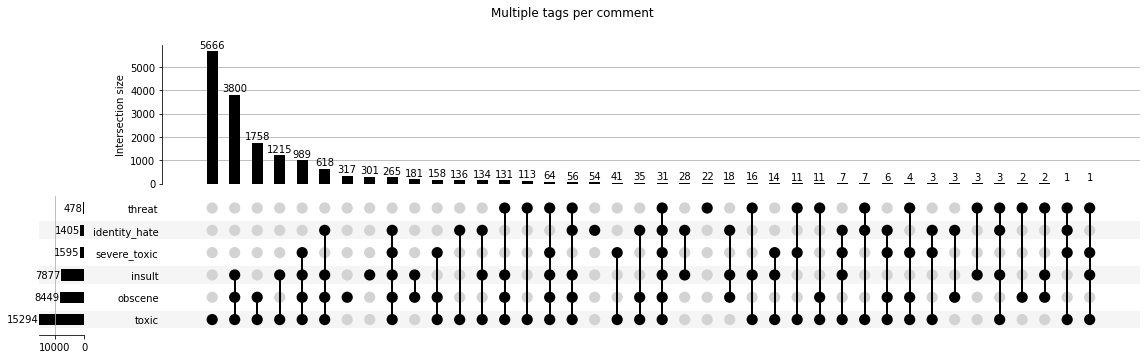

In [22]:
# Multiple labels
print("There are %s comments, but %s comment labels." % (df.shape[0], int(df.shape[0]*ratio.sum())))

df_subset = df.loc[df[INNOCENT_LABEL] == 0]    
plotSetIntersections(df_subset, TOXIC_LABELS, UNIQUE_ID)

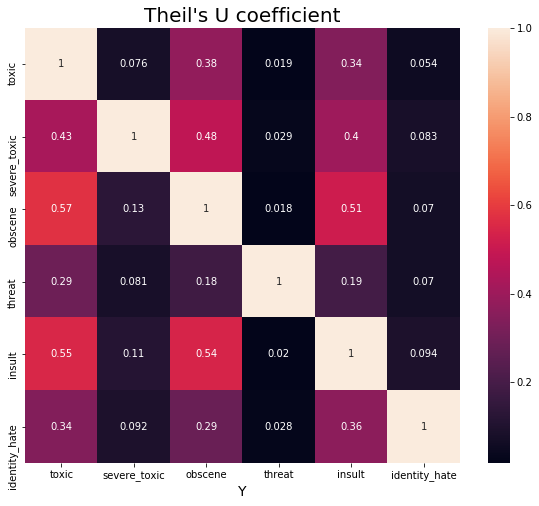

In [23]:
# Theil's U uncertanity coefficient 
# https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

uncertanity_coeff = calculateUncertanityCoeff(df, TOXIC_LABELS)
plotUncertanityCoeff(uncertanity_coeff, TOXIC_LABELS)

In [24]:
# Calculate TF-IDF (Term Frequency - Inverse Document Frequency) 
word_counts, features = calculateTFIDFscore(df[CONTENT_LABEL])

In [ ]:
# Sample features
SHOW_FEATURES = 200 
for feature in features[:SHOW_FEATURES]:
    print(feature)

In [ ]:
# Get most common words
NUM_WORDS_CAT = 10
NUM_WORDS_ALL = 20
words, counts = getTopWordsByCategory(df, TOXIC_LABELS, word_counts, features, NUM_WORDS_CAT)
words_all, counts_all = getTopWordsByCategory(df, TOXIC_LABELS, word_counts, features, NUM_WORDS_ALL, aggregate = True)

In [ ]:
plotTopWords(words_all[0], counts_all[0], "All")

In [ ]:
plotTopWordsByCategory(words, counts, TOXIC_LABELS)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(word_counts, df[TOXIC_LABELS], test_size=0.2, random_state=666)
metrics_train, metrics_test, measures = trainBagOfWords(model, X_train, X_test, y_train, y_test, TOXIC_LABELS)

In [ ]:
print("Model performance on training set")
pd.DataFrame(metrics_train, columns = TOXIC_LABELS, index = measures)

In [ ]:
print("Model performance on test set")
pd.DataFrame(metrics_test, columns = TOXIC_LABELS, index = measures)